In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [58]:
df = pd.read_csv("D:\Data_Sets\hotel_bookings.csv")
df.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [59]:
#check the number of missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [60]:
def abc(series):
    return series.fillna(st.median(series))



#command to fill the empty cells
df.children = df["children"].transform(abc)

In [61]:
def xyz(series):
    return series.fillna(st.mode(series))



#command to fill the empty cells
df.country = df["country"].transform(xyz)
df.agent = df["agent"].transform(xyz)
df.company = df["company"].transform(xyz)

In [62]:
#check the number of missing values Now
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [63]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [64]:
df.drop(["arrival_date_year","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","reservation_status","reservation_status_date"], axis = 1, inplace = True)

In [65]:
df.drop(["is_repeated_guest","previous_cancellations","previous_bookings_not_canceled"], axis = 1, inplace = True)
df.head(7)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,...,C,0,No Deposit,9.0,40.0,0,Transient,107.0,0,0


In [66]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
babies                           int64
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
agent                          float64
company                        float64
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x = df.drop(["hotel","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"], axis = 1)
y = df[["hotel"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=97)

In [71]:
model.fit(x_train, y_train)

D:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Conda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
# Getting predictions from the model 
predictions = model.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test , predictions))

0.8700982258432955


Text(42.0, 0.5, 'Truth')

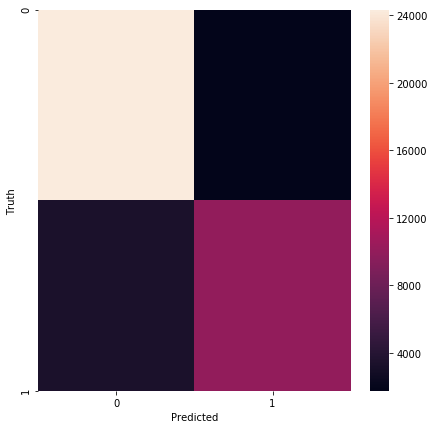

In [88]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (7,7))
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')